In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, classification_report, accuracy_score

In [15]:
full_df = pd.read_csv("C:/Users/Kiat Kai/Desktop/NOTES/Y4S2/ST4248/winequality-red.csv")
full_df.shape

(1599, 12)

## Perform preprocessing
- We upsample those wine qualities with much lower counts than the majority wine quality

In [83]:
full_df_3 = full_df[full_df.quality==3]     # MINORITY          
full_df_4 = full_df[full_df.quality==4]     # MINORITY          
full_df_5 = full_df[full_df.quality==5]     # MAJORITY
full_df_6 = full_df[full_df.quality==6]     # MAJORITY
full_df_7 = full_df[full_df.quality==7]     # MINORITY
full_df_8 = full_df[full_df.quality==8]     # MINORITY

In [84]:
# Upsample MINORITY Class to make balance data :
full_df_3_upsampled = resample(full_df_3, replace=True, n_samples=681, random_state=12) 
full_df_4_upsampled = resample(full_df_4, replace=True, n_samples=681, random_state=12) 
full_df_6_upsampled = resample(full_df_6, replace=True, n_samples=681, random_state=12)
full_df_7_upsampled = resample(full_df_7, replace=True, n_samples=681, random_state=12) 
full_df_8_upsampled = resample(full_df_8, replace=True, n_samples=681, random_state=12) 

In [113]:
# Combine downsampled majority class with upsampled minority class
data = pd.concat([full_df_3_upsampled, full_df_4_upsampled, full_df_7_upsampled, 
                              full_df_8_upsampled, full_df_5, full_df_6_upsampled]).reset_index(drop=True)
data.to_csv("balanced_wine.csv")

## Train Test Split

In [146]:
# Split into X and Y
Y = data.iloc[:,-1]
X = data.drop(data.columns[-1], axis=1)

# Now, train test split
X_train, Xtest, Y_train, Ytest = train_test_split(X, Y, train_size=0.8, random_state=101)

# Scale the data to a range of 0 to 1
#scaler = MinMaxScaler()
#X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
#Xtest = pd.DataFrame(scaler.fit_transform(Xtest), columns = Xtest.columns)
#Y_train = pd.DataFrame(scaler.fit_transform(Y_train.values.reshape(-1,1)), columns = [Y_train.name])
#Ytest = pd.DataFrame(scaler.fit_transform(Ytest.values.reshape(-1,1)), columns = [Ytest.name])

## 1) LDA

In [150]:
lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X_train, Y_train).predict(Xtest)
f1_lda = f1_score(Ytest, y_pred, average='macro')
acc_lda = accuracy_score(y_pred, Ytest)
print("F1 Score for Linear Discriminant Analysis Classifier is", f1_lda)
print("Accuracy Score for Linear Discriminant Analysis Classifier is", acc_lda)
print(classification_report(Ytest,y_pred))

F1 Score for Linear Discriminant Analysis Classifier is 0.48655256723716384
Accuracy Score for Linear Discriminant Analysis Classifier is 0.48655256723716384
              precision    recall  f1-score   support

           3       0.67      0.63      0.65       142
           4       0.39      0.36      0.37       139
           5       0.50      0.49      0.49       161
           6       0.36      0.34      0.35       120
           7       0.43      0.49      0.46       131
           8       0.56      0.59      0.57       125

    accuracy                           0.49       818
   macro avg       0.48      0.48      0.48       818
weighted avg       0.49      0.49      0.49       818



## 2) QDA

In [151]:
qda = QuadraticDiscriminantAnalysis()
y_pred = qda.fit(X_train, Y_train).predict(Xtest)
f1_qda = f1_score(Ytest, y_pred, average='macro')
acc_qda = accuracy_score(y_pred, Ytest)
print("F1 Score for Quadratic Discriminant Analysis Classifier is", f1_qda)
print("Accuracy Score for Quadratic Discriminant Analysis Classifier is", acc_qda)
print(classification_report(Ytest,y_pred))

F1 Score for Quadratic Discriminant Analysis Classifier is 0.6662591687041565
Accuracy Score for Linear Discriminant Analysis Classifier is 0.6662591687041565
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       142
           4       0.61      0.44      0.51       139
           5       0.55      0.55      0.55       161
           6       0.38      0.46      0.41       120
           7       0.67      0.56      0.61       131
           8       0.79      1.00      0.88       125

    accuracy                           0.67       818
   macro avg       0.67      0.67      0.66       818
weighted avg       0.67      0.67      0.66       818



C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## 3) Naive Bayes

In [152]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train).predict(Xtest)
f1_nb = f1_score(Ytest, y_pred, average='macro')
acc_nb = accuracy_score(y_pred, Ytest)
print("F1 Score for Naive Bayes Classifier is", f1_nb)
print("Accuracy Score for Naive Bayes Classifier is", acc_nb)
print(classification_report(Ytest,y_pred))

F1 Score for Naive Bayes Classifier is 0.4963325183374083
Accuracy Score for Naive Bayes Classifier is 0.4963325183374083
              precision    recall  f1-score   support

           3       0.57      0.81      0.67       142
           4       0.40      0.19      0.25       139
           5       0.49      0.47      0.48       161
           6       0.38      0.34      0.36       120
           7       0.53      0.32      0.40       131
           8       0.50      0.86      0.63       125

    accuracy                           0.50       818
   macro avg       0.48      0.50      0.47       818
weighted avg       0.48      0.50      0.47       818



## 4) Random Forest

In [199]:
rfc=RandomForestClassifier(random_state=100)

param_grid = { 
    'n_estimators': [200, 300, 400, 500],
    'max_features': [3,4],
    'max_depth' : [4,6,8,10,12,14],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14],
                         'max_features': [3, 4],
                         'n_estimators': [200, 300, 400, 500]})

In [200]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 3,
 'n_estimators': 500}

In [201]:
# Best parameters after tuning:
rf = RandomForestClassifier(random_state=100, n_estimators=500, criterion='entropy', max_depth=14, max_features=3)
y_pred = rf.fit(X_train, Y_train).predict(Xtest)
f1_rf = f1_score(Ytest, y_pred, average='macro')
acc_rf = accuracy_score(y_pred, Ytest)
print("F1 Score for Random Forest Classifier is", f1_rf)
print("Accuracy Score for Random Forest Classifier is", acc_rf)
print(classification_report(Ytest,y_pred))

F1 Score for Random Forest Classifier is 0.9230546756398611
Accuracy Score for Random Forest Classifier is 0.9229828850855746
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       142
           4       0.97      1.00      0.99       139
           5       0.91      0.75      0.82       161
           6       0.76      0.85      0.80       120
           7       0.93      0.96      0.94       131
           8       0.99      1.00      1.00       125

    accuracy                           0.92       818
   macro avg       0.92      0.93      0.92       818
weighted avg       0.93      0.92      0.92       818



## 5) Support Vector Classifier

In [206]:
svc=SVC(random_state=100)

param_grid = { 
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel': ['linear','rbf']
}

CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5)
CV_svc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=100),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']})

In [207]:
CV_svc.best_params_

{'C': 1.2, 'kernel': 'linear'}

In [208]:
# Best parameters after tuning:
rf = SVC(random_state=100, C=1.2, kernel="linear")
y_pred = rf.fit(X_train, Y_train).predict(Xtest)
f1_svc = f1_score(Ytest, y_pred, average='macro')
acc_svc = accuracy_score(y_pred, Ytest)
print("F1 Score for Support Vector Classifier is", f1_svc)
print("Accuracy Score for Support Vector Classifier is", acc_svc)
print(classification_report(Ytest,y_pred))

F1 Score for Support Vector Classifier is 0.5195121252974101
Accuracy Score for Support Vector Classifier is 0.5452322738386308
              precision    recall  f1-score   support

           3       0.70      1.00      0.82       142
           4       0.46      0.32      0.38       139
           5       0.52      0.51      0.52       161
           6       0.41      0.26      0.32       120
           7       0.43      0.47      0.45       131
           8       0.59      0.68      0.63       125

    accuracy                           0.55       818
   macro avg       0.52      0.54      0.52       818
weighted avg       0.52      0.55      0.52       818



## 6) Logistic Regression

In [97]:
LR = LogisticRegression(random_state=100)

param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}

# Create grid search object
CV_Lr = GridSearchCV(estimator=LR, param_grid=param_grid, cv= 5)
CV_Lr.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=100),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [98]:
CV_Lr.best_params_

{'C': 78.47599703514607, 'penalty': 'l2', 'solver': 'liblinear'}

In [154]:
# Best parameters after tuning:
Lr = LogisticRegression(random_state=100, C=78.47599703514607, penalty='l2',solver='liblinear')
y_pred = Lr.fit(X_train, Y_train).predict(Xtest)
f1_Lr = f1_score(Ytest, y_pred, average='macro')
acc_lr = accuracy_score(y_pred, Ytest)
print("F1 Score for Multinomial Logistic Regression is", f1_Lr)
print("Accuracy Score for Logistics Regression is", acc_lr)
print(classification_report(Ytest,y_pred))

F1 Score for Multinomial Logistic Regression is 0.5635696821515892
Accuracy Score for Logistics Regression is 0.5635696821515892
              precision    recall  f1-score   support

           3       0.67      0.92      0.78       142
           4       0.39      0.29      0.33       139
           5       0.53      0.54      0.54       161
           6       0.43      0.21      0.28       120
           7       0.55      0.51      0.53       131
           8       0.63      0.89      0.74       125

    accuracy                           0.56       818
   macro avg       0.53      0.56      0.53       818
weighted avg       0.54      0.56      0.54       818



## 7) Decision tree

In [100]:
DT = DecisionTreeClassifier(random_state=100)

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_features' :['auto', 'sqrt', 'log2'],
    'max_depth':np.arange(1,20)
}

# Create grid search object
CV_tree = GridSearchCV(estimator=DT, param_grid=param_grid, cv= 5)
CV_tree.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [101]:
CV_tree.best_params_

{'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto'}

In [155]:
# Best parameters after tuning:
Dt = DecisionTreeClassifier(random_state=100, criterion='gini', max_depth=16, max_features='auto')
y_pred = Dt.fit(X_train, Y_train).predict(Xtest)
f1_Dt = f1_score(Ytest, y_pred, average='macro')
acc_dt = accuracy_score(y_pred, Ytest)
print("F1 Score for Decision Tree is", f1_Dt)
print("Accuracy Score for decision tree classifier is", acc_dt)
print(classification_report(Ytest,y_pred))

F1 Score for Decision Tree is 0.9095354523227384
Accuracy Score for decision tree classifier is 0.9095354523227384
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       142
           4       0.93      1.00      0.97       139
           5       0.87      0.69      0.77       161
           6       0.74      0.83      0.78       120
           7       0.95      0.97      0.96       131
           8       0.98      1.00      0.99       125

    accuracy                           0.91       818
   macro avg       0.91      0.92      0.91       818
weighted avg       0.91      0.91      0.91       818



## Evaluating all models

In [209]:
# Dataframe to contain model results
model_results = pd.DataFrame(columns=["Models","F1 Score","Accuracy Score"])

# LDA
model_results = model_results.append(pd.DataFrame({"Models":"Linear Discriminant Analysis", 
                                  "F1 Score":f1_lda, "Accuracy Score":acc_lda}
                                                  , index = [0]), ignore_index = False)
# QDA
model_results = model_results.append(pd.DataFrame({"Models":"Quadratic Discriminant Analysis", 
                                  "F1 Score":f1_qda, "Accuracy Score":acc_qda}
                                                  , index = [1]), ignore_index = False)
# Naive Bayes
model_results = model_results.append(pd.DataFrame({"Models":"Naive Bayes", 
                                  "F1 Score":f1_nb, "Accuracy Score":acc_nb}
                                                  , index = [2]), ignore_index = False)
# Random Forest
model_results = model_results.append(pd.DataFrame({"Models":"Random Forest", 
                                  "F1 Score":f1_rf, "Accuracy Score":acc_rf}
                                                  , index = [3]), ignore_index = False)
# Support Vector Classifier
model_results = model_results.append(pd.DataFrame({"Models":"Support Vector Classifier", 
                                  "F1 Score":f1_svc, "Accuracy Score":acc_svc}
                                                  , index = [4]), ignore_index = False)
# Multinomial Logistic Regression
model_results = model_results.append(pd.DataFrame({"Models":"Multinomial Logistic Regression", 
                                  "F1 Score":f1_Lr, "Accuracy Score":acc_lr}
                                                  , index = [5]), ignore_index = False)
# Decision Tree
model_results = model_results.append(pd.DataFrame({"Models":"Decision Tree", 
                                  "F1 Score":f1_Dt, "Accuracy Score":acc_dt}
                                                  , index = [6]), ignore_index = False)

print(model_results.sort_values(by="F1 Score", ascending = False))
model_results.to_csv("model_results_upsample.csv")

                            Models  F1 Score  Accuracy Score
3                    Random Forest  0.923055        0.922983
6                    Decision Tree  0.909535        0.909535
1  Quadratic Discriminant Analysis  0.666259        0.666259
5  Multinomial Logistic Regression  0.563570        0.563570
4        Support Vector Classifier  0.519512        0.545232
2                      Naive Bayes  0.496333        0.496333
0     Linear Discriminant Analysis  0.486553        0.486553


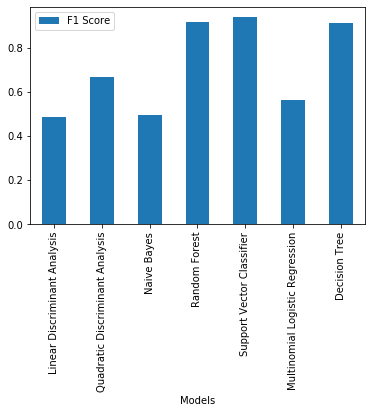

In [194]:
model_results = model_results.set_index(model_results.Models)
model_results.iloc[:,1].plot.bar(x=model_results.Models,y=model_results["F1 Score"])
plt.legend()